Cameron Crowell

800822830

Final Project

5/6/2024

# **Load dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Cameron29a/ML_Final/resume.csv')

In [3]:
df.head()

job_ad_id job_city   job_industry    job_type  job_fed_contractor  \
0        384  Chicago  manufacturing  supervisor                 NaN   
1        384  Chicago  manufacturing  supervisor                 NaN   
2        384  Chicago  manufacturing  supervisor                 NaN   
3        384  Chicago  manufacturing  supervisor                 NaN   
4        385  Chicago  other_service   secretary                 0.0   

   job_equal_opp_employer job_ownership  job_req_any  job_req_communication  \
0                       1       unknown            1                      0   
1                       1       unknown            1                      0   
2                       1       unknown            1                      0   
3                       1       unknown            1                      0   
4                       1     nonprofit            1                      0   

   job_req_education  ... honors  worked_during_school  years_experience  \
0                  0  ...      0                     0                 6   
1                  0  ...      0                     1                 6   
2                  0  ...      0                     1                 6   
3                  0  ...      0                     0                 6   
4                  0  ...      0                     1                22   

  computer_skills  special_skills volunteer military employment_holes  \
0               1               0         0        0                1   
1               1               0         1        1                0   
2               1               0         0        0                0   
3               1               1         1        0                1   
4               1               0         0        0                0   

   has_email_address  resume_quality  
0                  0             low  
1                  1            high  
2                  0             low  
3                  1            high  
4                  1            high  

[5 rows x 30 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [7]:
#DIVIDING THE COLUMNS INTO CATEGORICAL AND NUMERICAL LISTS
Categorical = []
Numerical = []

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical.append(col)
    else:
        Numerical.append(col)

In [9]:
Categorical

['job_city',
 'job_industry',
 'job_type',
 'job_ownership',
 'job_req_min_experience',
 'job_req_school',
 'firstname',
 'race',
 'gender',
 'resume_quality']

In [10]:
Numerical

['job_ad_id',
 'job_fed_contractor',
 'job_equal_opp_employer',
 'job_req_any',
 'job_req_communication',
 'job_req_education',
 'job_req_computer',
 'job_req_organization',
 'received_callback',
 'years_college',
 'college_degree',
 'honors',
 'worked_during_school',
 'years_experience',
 'computer_skills',
 'special_skills',
 'volunteer',
 'military',
 'employment_holes',
 'has_email_address']

In [11]:
for col in Categorical:
    print(df[col].unique())

['Chicago' 'Boston']
['manufacturing' 'other_service' 'wholesale_and_retail_trade'
 'business_and_personal_service' 'finance_insurance_real_estate'
 'transportation_communication']
['supervisor' 'secretary' 'sales_rep' 'retail_sales' 'manager' 'clerical']
['unknown' 'nonprofit' 'private' 'public']
['5' 'some' nan '3' '2' '1' '8' '7' '0.5' '10' '0' '4' '6']
['none_listed' 'some_college' 'college' 'high_school_grad']
['Allison' 'Kristen' 'Lakisha' 'Latonya' 'Carrie' 'Jay' 'Jill' 'Kenya'
 'Tyrone' 'Aisha' 'Geoffrey' 'Matthew' 'Tamika' 'Leroy' 'Todd' 'Greg'
 'Keisha' 'Brad' 'Laurie' 'Meredith' 'Anne' 'Emily' 'Latoya' 'Ebony'
 'Brendan' 'Hakim' 'Jamal' 'Neil' 'Tremayne' 'Brett' 'Darnell' 'Sarah'
 'Jermaine' 'Tanisha' 'Rasheed' 'Kareem']
['white' 'black']
['f' 'm']
['low' 'high']


# **Exploratory Data Analysis**

In [12]:
# descriptive statistics
df.describe().T

count        mean         std  min     25%    50%  \
job_ad_id               4870.0  651.777823  388.690698  1.0  306.25  647.0   
job_fed_contractor      3102.0    0.114765    0.318789  0.0    0.00    0.0   
job_equal_opp_employer  4870.0    0.291170    0.454349  0.0    0.00    0.0   
job_req_any             4870.0    0.787269    0.409281  0.0    1.00    1.0   
job_req_communication   4870.0    0.124846    0.330578  0.0    0.00    0.0   
job_req_education       4870.0    0.106776    0.308860  0.0    0.00    0.0   
job_req_computer        4870.0    0.437166    0.496087  0.0    0.00    0.0   
job_req_organization    4870.0    0.072690    0.259654  0.0    0.00    0.0   
received_callback       4870.0    0.080493    0.272083  0.0    0.00    0.0   
years_college           4870.0    3.618480    0.714997  0.0    3.00    4.0   
college_degree          4870.0    0.719507    0.449286  0.0    0.00    1.0   
honors                  4870.0    0.052772    0.223601  0.0    0.00    0.0   
worked_during_school    4870.0    0.559548    0.496492  0.0    0.00    1.0   
years_experience        4870.0    7.842916    5.044612  1.0    5.00    6.0   
computer_skills         4870.0    0.820534    0.383782  0.0    1.00    1.0   
special_skills          4870.0    0.328747    0.469806  0.0    0.00    0.0   
volunteer               4870.0    0.411499    0.492156  0.0    0.00    0.0   
military                4870.0    0.097125    0.296159  0.0    0.00    0.0   
employment_holes        4870.0    0.448049    0.497345  0.0    0.00    0.0   
has_email_address       4870.0    0.479261    0.499621  0.0    0.00    0.0   

                           75%     max  
job_ad_id               979.75  1344.0  
job_fed_contractor        0.00     1.0  
job_equal_opp_employer    1.00     1.0  
job_req_any               1.00     1.0  
job_req_communication     0.00     1.0  
job_req_education         0.00     1.0  
job_req_computer          1.00     1.0  
job_req_organization      0.00     1.0  
received_callback         0.00     1.0  
years_college             4.00     4.0  
college_degree            1.00     1.0  
honors                    0.00     1.0  
worked_during_school      1.00     1.0  
years_experience          9.00    44.0  
computer_skills           1.00     1.0  
special_skills            1.00     1.0  
volunteer                 1.00     1.0  
military                  0.00     1.0  
employment_holes          1.00     1.0  
has_email_address         1.00     1.0

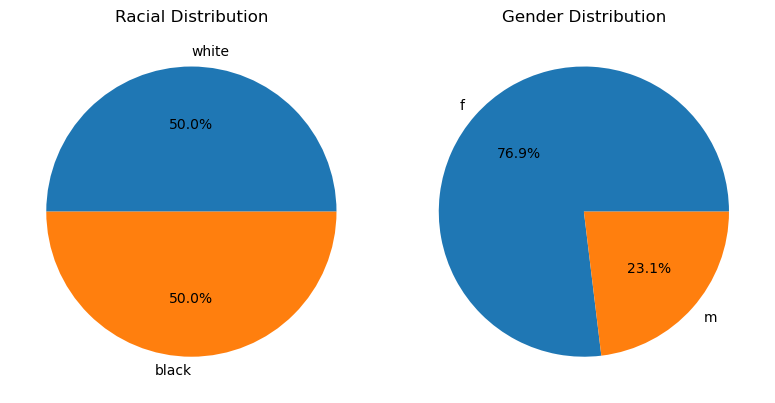

In [13]:
# Racial and Gender distribution
# Calculate the proportions of racial groups
race_proportions = df['race'].value_counts(normalize=True) * 100

# Calculate the proportions of gender groups
gender_proportions = df['gender'].value_counts(normalize=True) * 100

# Create subplots for racial and gender distribution
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot racial distribution as a pie chart
axes[0].pie(race_proportions.values, labels=racial_proportions.index, autopct='%1.1f%%')
axes[0].set_title('Racial Distribution')

# Plot gender distribution as a pie chart
axes[1].pie(gender_proportions.values, labels=gender_proportions.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

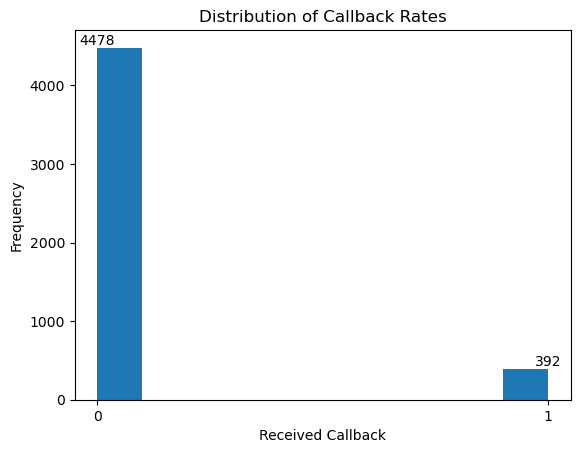

In [14]:
# Plot a histogram of callback rates
plt.hist(df["received_callback"])
plt.xlabel("Received Callback")
plt.ylabel("Frequency")
plt.title("Distribution of Callback Rates")

# Add frequency value labels
for i in range(len(df["received_callback"].value_counts())):
    plt.text(df["received_callback"].value_counts().index[i], 
             df["received_callback"].value_counts()[i], 
             str(df["received_callback"].value_counts()[i]), 
             ha='center', va='bottom')

plt.xticks([0, 1])
    
plt.show()

In [15]:
# Calculate callback rates by race

race_callback_rates = df.groupby("race")["received_callback"].mean()
print(race_callback_rates)

race
black    0.064476
white    0.096509
Name: received_callback, dtype: float64


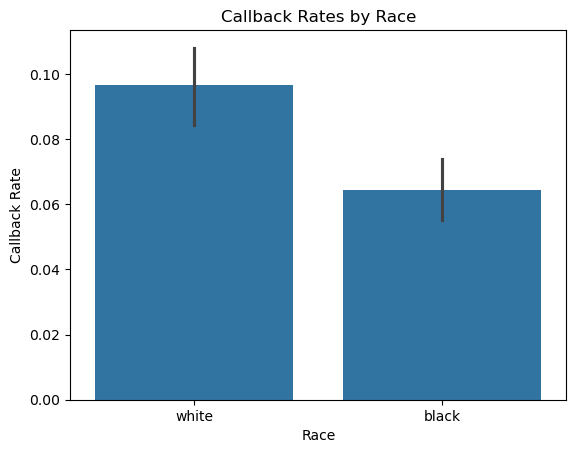

In [16]:
# Visualize callback rates by race

sns.barplot(x="race", y="received_callback", data=df)
plt.xlabel("Race")
plt.ylabel("Callback Rate")
plt.title("Callback Rates by Race")
plt.show()

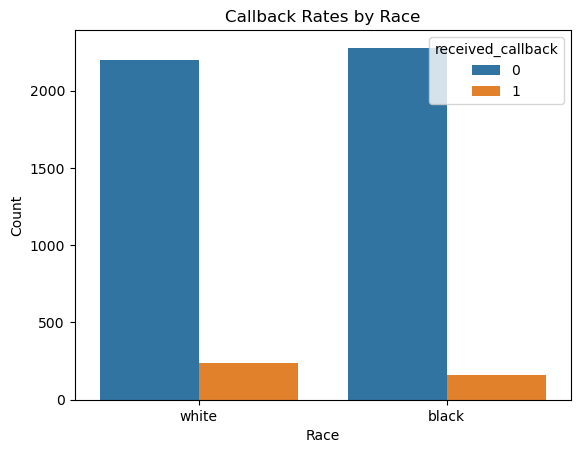

In [17]:
# Plot a bar chart of callback rates by race
sns.countplot(x="race", hue="received_callback", data=df)
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Callback Rates by Race")
plt.show()

In [18]:
# Calculate callback rates by gender

gender_callback_rates = df.groupby("gender")["received_callback"].mean()
print(gender_callback_rates)

gender
f    0.082488
m    0.073843
Name: received_callback, dtype: float64


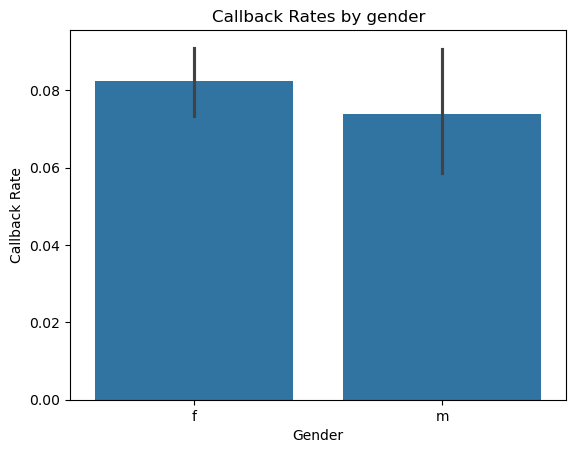

In [19]:
# Visualize callback rates by gender

sns.barplot(x="gender", y="received_callback", data=df)
plt.xlabel("Gender")
plt.ylabel("Callback Rate")
plt.title("Callback Rates by gender")
plt.show()

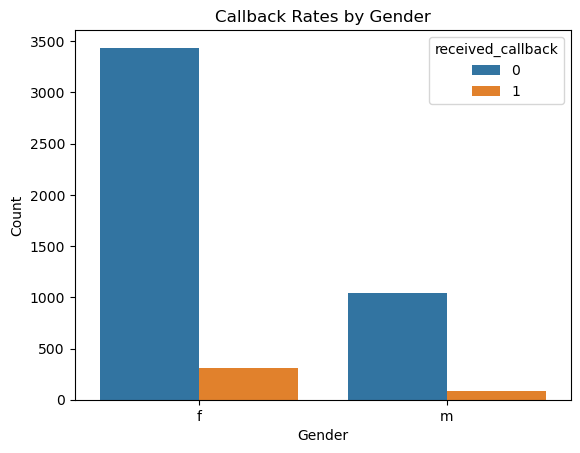

In [20]:
# Plot a bar chart of callback rates by gender
sns.countplot(x="gender", hue="received_callback", data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Callback Rates by Gender")
plt.show()

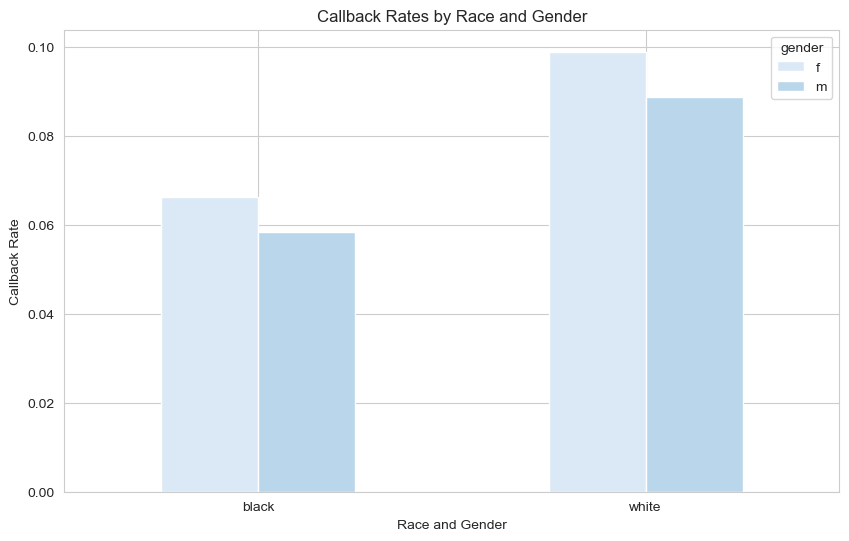

In [21]:
# Callback Rates by Race and Gender
callback_rates = df.groupby(['race', 'gender'])['received_callback'].mean().unstack()
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
callback_rates.plot(kind='bar', ax=ax, color=sns.color_palette("Blues"))

ax.set_xlabel('Race and Gender')
ax.set_ylabel('Callback Rate')
ax.set_title('Callback Rates by Race and Gender')
plt.xticks(rotation=0)

plt.show()

In [22]:
# Print exact values
print("Callback Rates by Race and Gender:")
print(callback_rates)

Callback Rates by Race and Gender:
gender         f         m
race                      
black   0.066278  0.058288
white   0.098925  0.088696


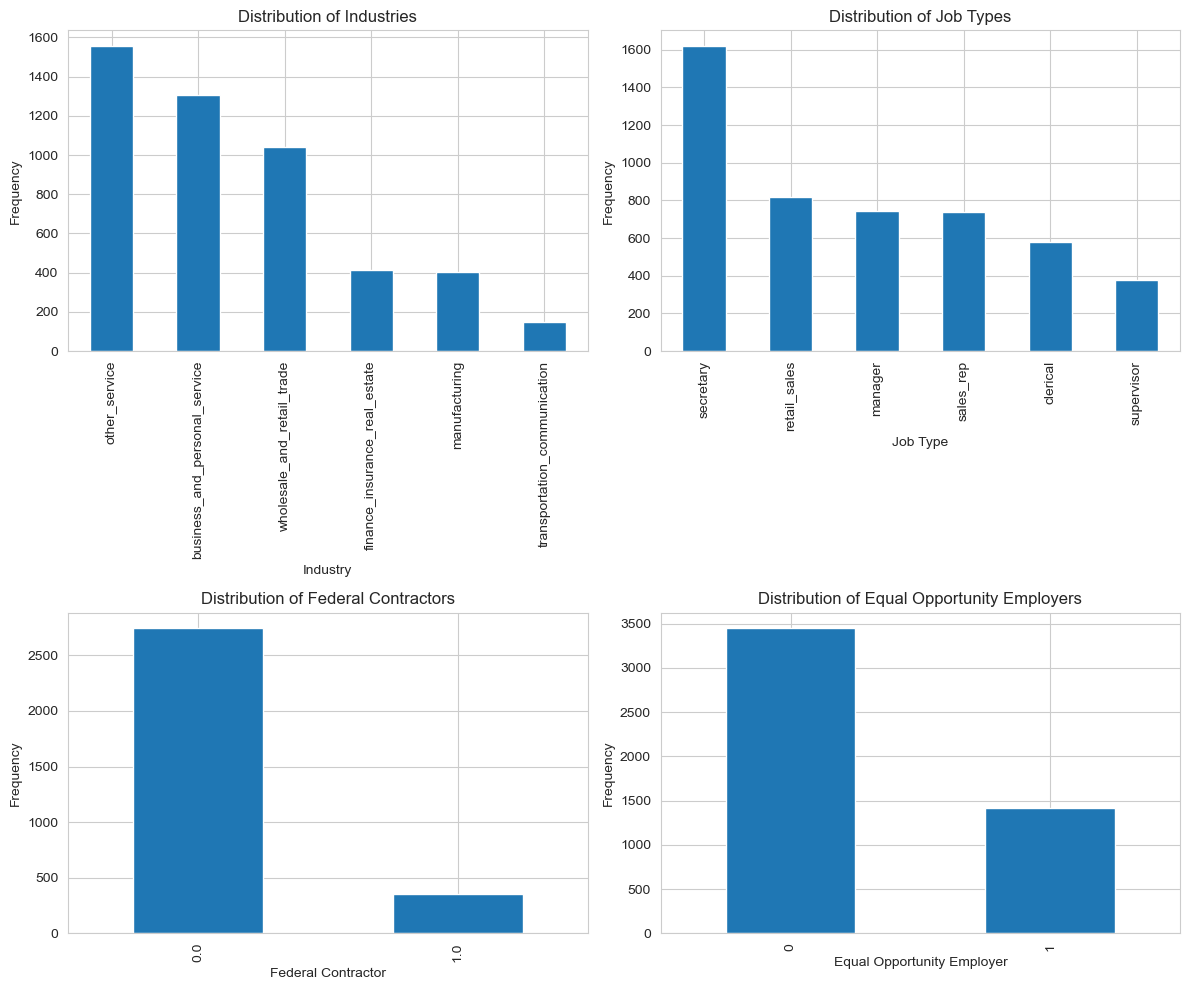

In [23]:
#Distribution of job attributes
industry_counts = df['job_industry'].value_counts()
job_type_counts = df['job_type'].value_counts()
fed_contractor_counts = df['job_fed_contractor'].value_counts()
equal_opp_employer_counts = df['job_equal_opp_employer'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

industry_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Industry')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Industries')

job_type_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xlabel('Job Type')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Job Types')

fed_contractor_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Federal Contractor')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Federal Contractors')

equal_opp_employer_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Equal Opportunity Employer')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Equal Opportunity Employers')

plt.tight_layout()
plt.show()

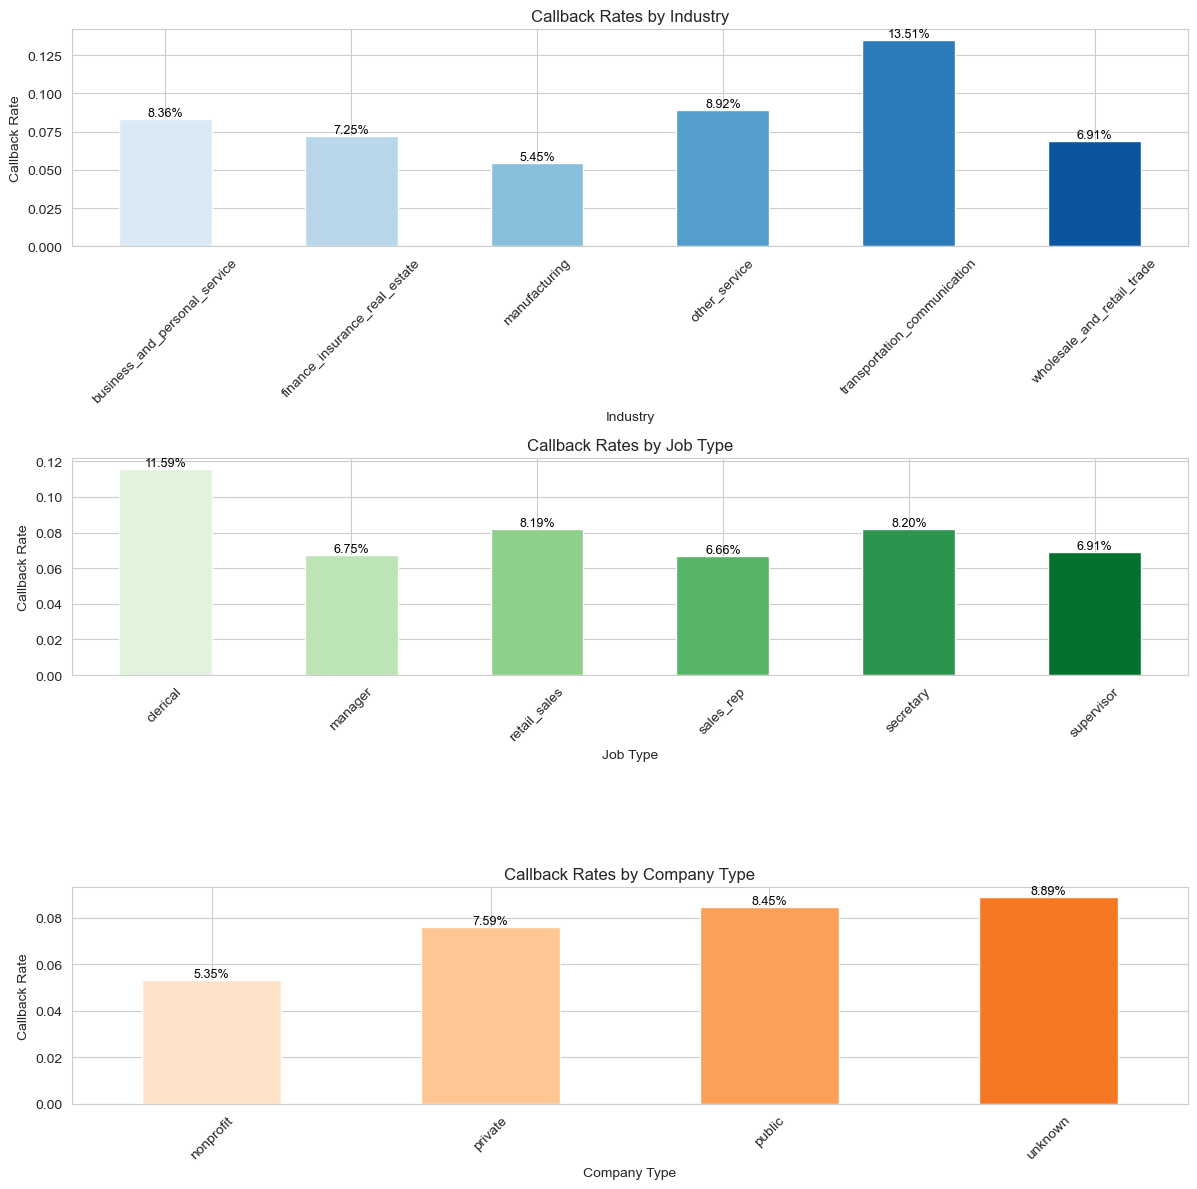

In [24]:
# Analyzing callback rates across job attributes
callback_rates_industry = df.groupby('job_industry')['received_callback'].mean()
callback_rates_job_type = df.groupby('job_type')['received_callback'].mean()
callback_rates_company_type = df.groupby('job_ownership')['received_callback'].mean()

sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
callback_rates_industry.plot(kind='bar', ax=axes[0], color=sns.color_palette("Blues"))
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Callback Rate')
axes[0].set_title('Callback Rates by Industry')
axes[0].tick_params(axis='x', rotation=45)


callback_rates_job_type.plot(kind='bar', ax=axes[1], color=sns.color_palette("Greens"))
axes[1].set_xlabel('Job Type')
axes[1].set_ylabel('Callback Rate')
axes[1].set_title('Callback Rates by Job Type')
axes[1].tick_params(axis='x', rotation=45)

callback_rates_company_type.plot(kind='bar', ax=axes[2], color=sns.color_palette("Oranges"))
axes[2].set_xlabel('Company Type')
axes[2].set_ylabel('Callback Rate')
axes[2].set_title('Callback Rates by Company Type')
axes[2].tick_params(axis='x', rotation=45)

def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', color='black', fontsize=9)

add_value_labels(axes[0])
add_value_labels(axes[1])
add_value_labels(axes[2])

plt.tight_layout()
plt.show()

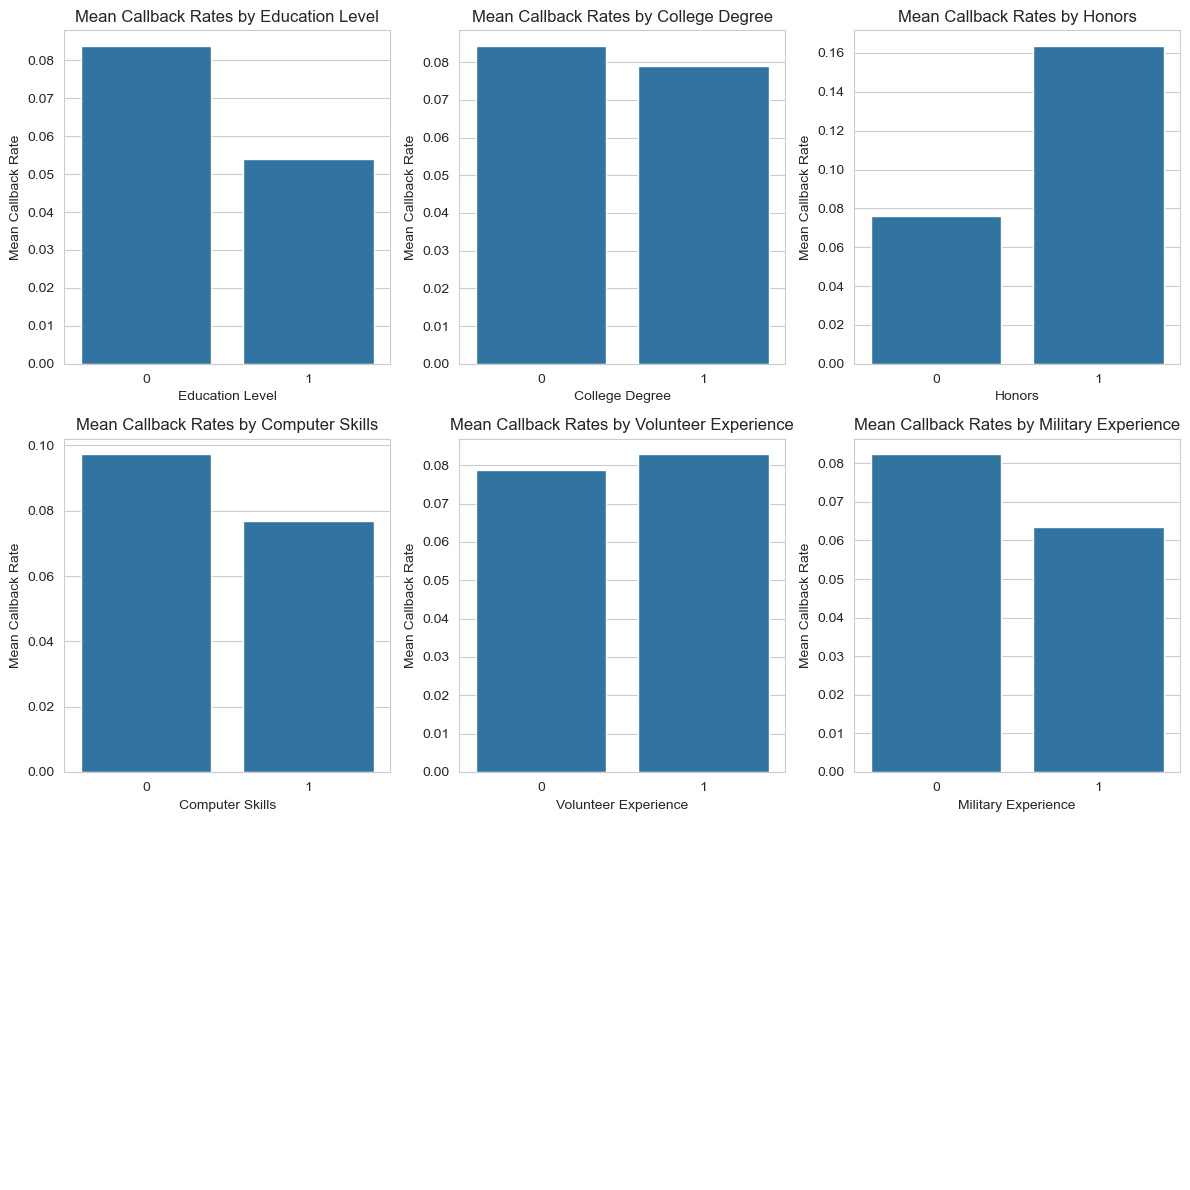

In [26]:
# Investigating resume characteristics
# Calculate mean callback rate by education level
callback_rates_education = df.groupby('job_req_education')['received_callback'].mean().reset_index()

# Calculate mean callback rate by college degree
callback_rates_degree = df.groupby('college_degree')['received_callback'].mean().reset_index()

# Calculate mean callback rate by honors
callback_rates_honors = df.groupby('honors')['received_callback'].mean().reset_index()

# Calculate mean callback rate by computer skills
callback_rates_computer = df.groupby('computer_skills')['received_callback'].mean().reset_index()

# Calculate mean callback rate by volunteer experience
callback_rates_volunteer = df.groupby('volunteer')['received_callback'].mean().reset_index()

# Calculate mean callback rate by military experience
callback_rates_military = df.groupby('military')['received_callback'].mean().reset_index()

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Plot 1 - Education Level
sns.barplot(x='job_req_education', y='received_callback', data=callback_rates_education, ax=axes[0, 0])
axes[0, 0].set_xlabel('Education Level')
axes[0, 0].set_ylabel('Mean Callback Rate')
axes[0, 0].set_title('Mean Callback Rates by Education Level')

# Plot 2 - College Degree
sns.barplot(x='college_degree', y='received_callback', data=callback_rates_degree, ax=axes[0, 1])
axes[0, 1].set_xlabel('College Degree')
axes[0, 1].set_ylabel('Mean Callback Rate')
axes[0, 1].set_title('Mean Callback Rates by College Degree')

# Plot 3 - Honors
sns.barplot(x='honors', y='received_callback', data=callback_rates_honors, ax=axes[0, 2])
axes[0, 2].set_xlabel('Honors')
axes[0, 2].set_ylabel('Mean Callback Rate')
axes[0, 2].set_title('Mean Callback Rates by Honors')

# Plot 4 - Computer Skills
sns.barplot(x='computer_skills', y='received_callback', data=callback_rates_computer, ax=axes[1, 0])
axes[1, 0].set_xlabel('Computer Skills')
axes[1, 0].set_ylabel('Mean Callback Rate')
axes[1, 0].set_title('Mean Callback Rates by Computer Skills')

# Plot 5 - Volunteer Experience
sns.barplot(x='volunteer', y='received_callback', data=callback_rates_volunteer, ax=axes[1, 1])
axes[1, 1].set_xlabel('Volunteer Experience')
axes[1, 1].set_ylabel('Mean Callback Rate')
axes[1, 1].set_title('Mean Callback Rates by Volunteer Experience')

# Plot 6 - Military Experience
sns.barplot(x='military', y='received_callback', data=callback_rates_military, ax=axes[1, 2])
axes[1, 2].set_xlabel('Military Experience')
axes[1, 2].set_ylabel('Mean Callback Rate')
axes[1, 2].set_title('Mean Callback Rates by Military Experience')

# Remove empty subplots
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Adjust subplot spacing and alignment
plt.tight_layout()

# Show the plots
plt.show()

# **Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
Le = LabelEncoder()

In [29]:
#IF COLUMN HAS LESS THAN 3 UNIQUE CATEGORICAL VALUES THEN LABEL ENCODING, ELSE FREQUENCY ENCODING WILL BE PERFORMED
for col in Categorical:
    if len(df[col].unique()) <= 3:
        df[col] = Le.fit_transform(df[col])
    else:
        freq_encoding = df[col].value_counts(normalize=True).to_dict()
        df[col] = df[col].map(freq_encoding)

# **Data Visualization**

# **Train & Test Split**

In [34]:
#DROPPING NULL VALUES
df = df.drop(['job_ad_id','job_fed_contractor','job_req_min_experience'],axis=1)

df.isnull().sum()

job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_ownership             0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_computer          0
job_req_organization      0
job_req_school            0
received_callback         0
firstname                 0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.iloc[:,:-1]
X

job_city  job_industry  job_type  job_equal_opp_employer  job_ownership  \
0            1      0.082957  0.077207                       1       0.409035   
1            1      0.082957  0.077207                       1       0.409035   
2            1      0.082957  0.077207                       1       0.409035   
3            1      0.082957  0.077207                       1       0.409035   
4            1      0.319918  0.332854                       1       0.065298   
...        ...           ...       ...                     ...            ...   
4865         0      0.085010  0.332854                       0       0.438193   
4866         0      0.319918  0.152156                       0       0.409035   
4867         0      0.319918  0.152156                       0       0.409035   
4868         0      0.319918  0.152156                       0       0.409035   
4869         0      0.319918  0.152156                       0       0.409035   

      job_req_any  job_req_communication  job_req_education  job_req_computer  \
0               1                      0                  0                 1   
1               1                      0                  0                 1   
2               1                      0                  0                 1   
3               1                      0                  0                 1   
4               1                      0                  0                 1   
...           ...                    ...                ...               ...   
4865            1                      0                  0                 1   
4866            0                      0                  0                 0   
4867            0                      0                  0                 0   
4868            0                      0                  0                 0   
4869            0                      0                  0                 0   

      job_req_organization  ...  college_degree  honors  worked_during_school  \
0                        0  ...               1       0                     0   
1                        0  ...               0       0                     1   
2                        0  ...               1       0                     1   
3                        0  ...               0       0                     0   
4                        1  ...               0       0                     1   
...                    ...  ...             ...     ...                   ...   
4865                     0  ...               0       0                     0   
4866                     0  ...               1       0                     1   
4867                     0  ...               1       0                     1   
4868                     0  ...               1       0                     1   
4869                     0  ...               1       0                     0   

      years_experience  computer_skills  special_skills  volunteer  military  \
0                    6                1               0          0         0   
1                    6                1               0          1         1   
2                    6                1               0          0         0   
3                    6                1               1          1         0   
4                   22                1               0          0         0   
...                ...              ...             ...        ...       ...   
4865                 1                1               1          0         0   
4866                 6                1               0          0         0   
4867                 8                1               0          1         0   
4868                 2                1               0          1         1   
4869                 7                0               0          0         0   

      employment_holes  has_email_address  
0                    1                  0  
1                    0                

In [37]:
Y = df.iloc[:,-1:]
Y

resume_quality
0                  1
1                  0
2                  1
3                  0
4                  0
...              ...
4865               1
4866               1
4867               0
4868               0
4869               1

[4870 rows x 1 columns]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# **Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT = DecisionTreeClassifier()

In [41]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

# **Prediction**

In [42]:
Y_hat = DT.predict(X_test)

# **Model Evaluation**

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
print(accuracy_score(Y_test, Y_hat))

0.9804928131416838


In [45]:
print(classification_report(Y_test ,Y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       468
           1       0.98      0.98      0.98       506

    accuracy                           0.98       974
   macro avg       0.98      0.98      0.98       974
weighted avg       0.98      0.98      0.98       974



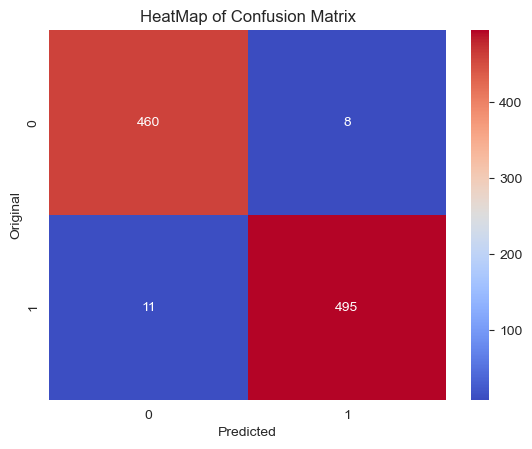

In [46]:
con = confusion_matrix(Y_test, Y_hat)

sns.heatmap(con,annot=True,fmt='d',cmap='coolwarm')
plt.title('HeatMap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Original')
plt.show()

has_email_address: 0.7981
volunteer: 0.1041
years_college: 0.0518
job_city: 0.0111
firstname: 0.0048
years_experience: 0.0044
job_ownership: 0.0035
job_industry: 0.0035
employment_holes: 0.0026
special_skills: 0.0024
worked_during_school: 0.0023
computer_skills: 0.0015
college_degree: 0.0015
military: 0.0014
job_req_education: 0.0013
job_type: 0.0012
job_equal_opp_employer: 0.0010
race: 0.0009
job_req_computer: 0.0009
gender: 0.0007
job_req_any: 0.0005
job_req_communication: 0.0003
honors: 0.0000
received_callback: 0.0000
job_req_school: 0.0000
job_req_organization: 0.0000


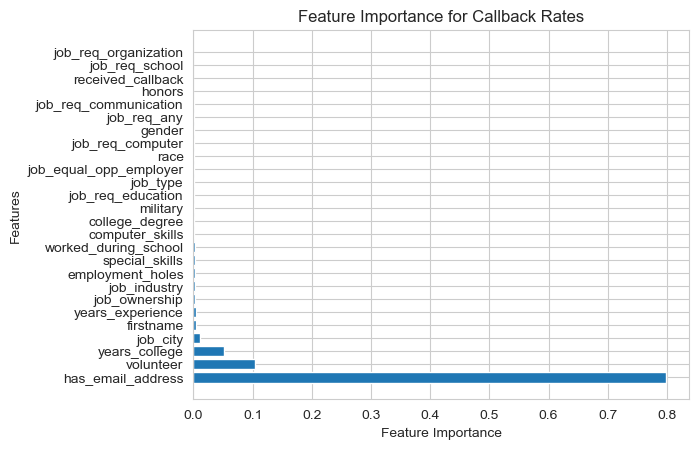

In [47]:
# Get feature importance
feature_importance = DT.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_features = sorted(zip(feature_importance, feature_names), reverse=True)

# Extract sorted importance values and feature names
sorted_importance = [importance for importance, _ in sorted_features]
sorted_feature_names = [feature for _, feature in sorted_features]

# Print the feature importance
for importance, feature in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Callback Rates')
plt.show()

# **Model Evaluation 2**

special_skills: 0.6818
race: 0.4801
honors: 0.4642
employment_holes: 0.4251
computer_skills: 0.3255
resume_quality: 0.2673
military: 0.2532
worked_during_school: 0.1945
has_email_address: 0.0942
volunteer: 0.0909
college_degree: 0.0723
years_college: 0.0434
years_experience: 0.0341
gender: 0.0148


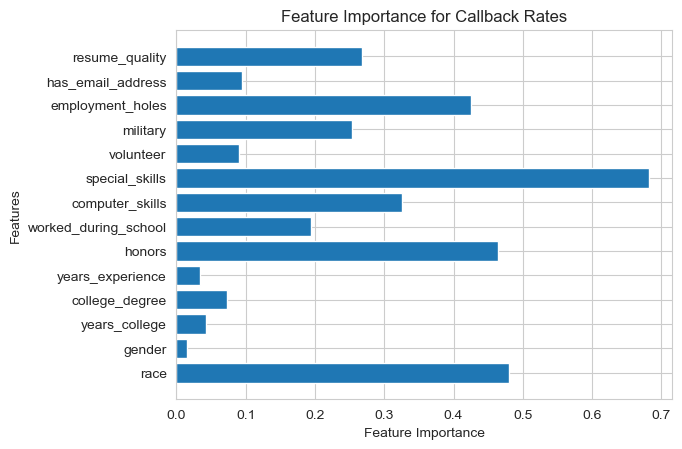

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#df = pd.read_csv('/Users/Cameron29a/ML_Final/resume.csv')

# Select relevant features and target variable
features = ['race', 'gender', 'years_college', 'college_degree', 'years_experience']
features = ['race', 'gender', 'years_college', 'college_degree', 'years_experience', 'honors', 'worked_during_school', 'computer_skills', 
            'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address', 'resume_quality']
target = 'received_callback'

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[features + [target]])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df_encoded.drop(target, axis=1), df_encoded[target], test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Get feature importance
feature_importance = abs(logreg.coef_[0])
feature_names = X_train.columns

# Sort features by importance
sorted_features = sorted(zip(feature_importance, feature_names), reverse=True)

# Print the feature importance
for importance, feature in sorted_features:
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
plt.barh(range(len(feature_importance)), feature_importance, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Callback Rates')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Select relevant features and target variable
features = ['race', 'gender', 'years_college', 'college_degree', 'years_experience']
features = ['race', 'gender', 'years_college', 'college_degree', 'years_experience', 'honors', 'worked_during_school', 'computer_skills', 
            'special_skills', 'volunteer', 'military', 'employment_holes', 'has_email_address', 'resume_quality']
target = 'received_callback'

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[features + [target]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(target, axis=1), df_encoded[target], test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_probs = logreg.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

# Support Vector Machines (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_probs = svm.predict_proba(X_test)[:, 1]

# Evaluate model performance
def evaluate_model(y_true, y_pred, y_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_probs)
    print(f'Accuracy: {accuracy:.4f}')
    #print(f'Precision: {precision:.4f}')
    #print(f'Recall: {recall:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')

print('Logistic Regression:')
evaluate_model(y_test, logreg_preds, logreg_probs)
print('\nRandom Forest:')
evaluate_model(y_test, rf_preds, rf_probs)
print('\nSupport Vector Machines (SVM):')
evaluate_model(y_test, svm_preds, svm_probs)

Logistic Regression:
Accuracy: 0.9343
AUC-ROC: 0.6482

Random Forest:
Accuracy: 0.9240
AUC-ROC: 0.5926

Support Vector Machines (SVM):
Accuracy: 0.9343
AUC-ROC: 0.4333


C:\Users\Cameron29a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Cameron29a\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


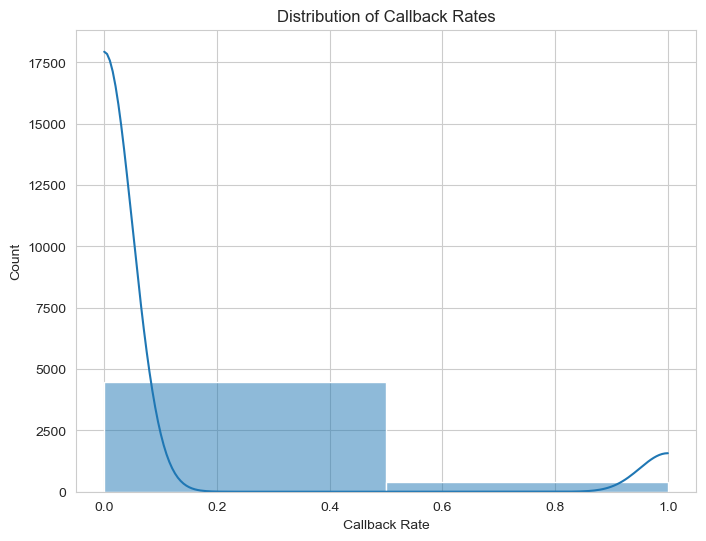

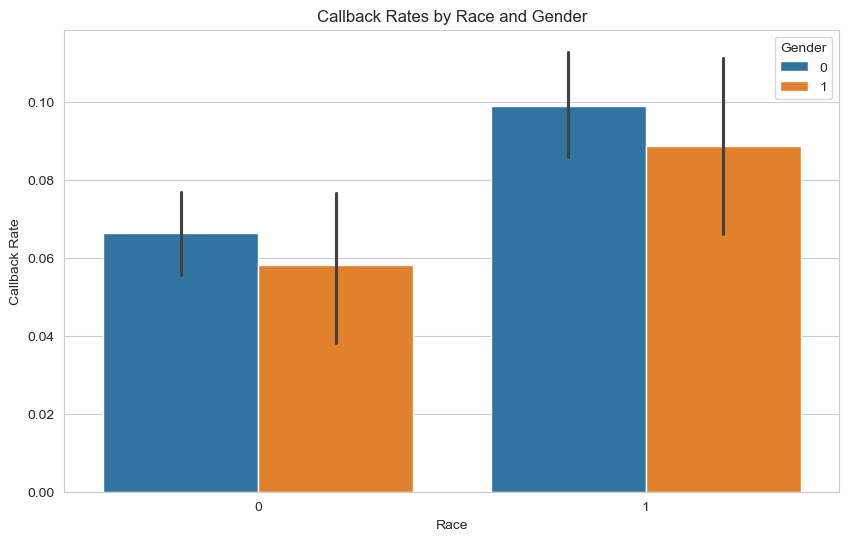

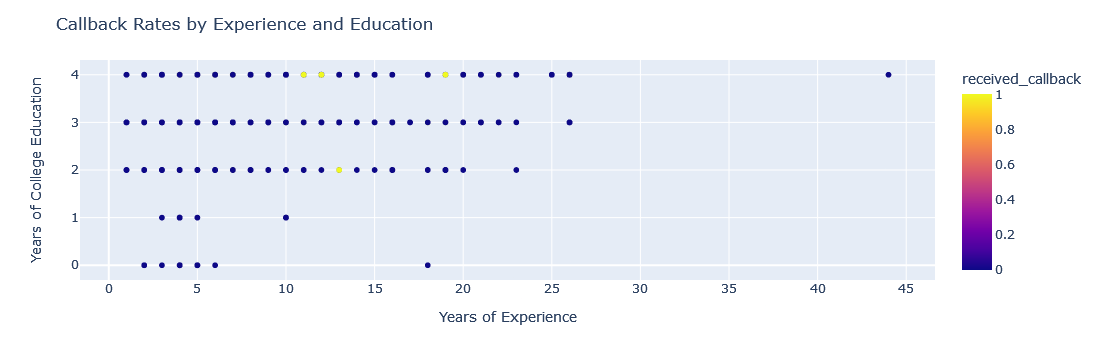

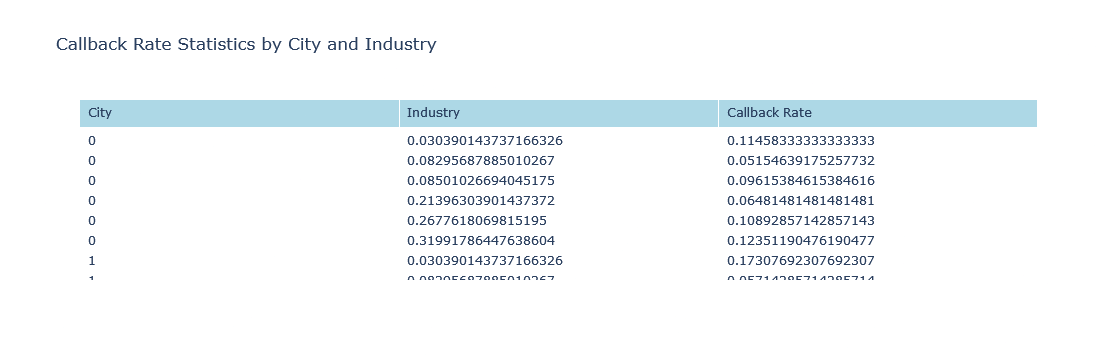

In [50]:
import plotly.express as px
import plotly.graph_objects as go


# Visualization 1: Histogram of Callback Rates
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='received_callback', bins=2, kde=True)
plt.xlabel('Callback Rate')
plt.ylabel('Count')
plt.title('Distribution of Callback Rates')
plt.show()

# Visualization 2: Bar Plot of Callback Rates by Race and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='race', y='received_callback', hue='gender')
plt.xlabel('Race')
plt.ylabel('Callback Rate')
plt.title('Callback Rates by Race and Gender')
plt.legend(title='Gender')
plt.show()

# Visualization 3: Interactive Scatter Plot of Callback Rates by Experience and Education
fig = px.scatter(df, x='years_experience', y='years_college', color='received_callback')
fig.update_layout(title='Callback Rates by Experience and Education',
                  xaxis_title='Years of Experience',
                  yaxis_title='Years of College Education')
fig.show()

# Visualization 4: Interactive Dashboard with Callback Rate Statistics
callback_stats = df.groupby(['job_city', 'job_industry'])['received_callback'].mean().reset_index()

fig = go.Figure(data=go.Table(
    header=dict(values=['City', 'Industry', 'Callback Rate'],
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[callback_stats['job_city'], callback_stats['job_industry'], callback_stats['received_callback']],
               fill_color='white',
               align='left')
))

fig.update_layout(title='Callback Rate Statistics by City and Industry')
fig.show()

In [51]:
import statsmodels.api as sm

# Select relevant features and target variable
features = ['race', 'gender', 'years_college', 'college_degree', 'years_experience']
target = 'received_callback'

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[features + [target]])

# Add an intercept column for logistic regression
df_encoded['intercept'] = 1

# Perform logistic regression with race and gender as independent variables
logit = sm.Logit(df_encoded[target], df_encoded[['intercept', 'race_black', 'race_white', 'gender_m']])

# Fit the model
results = logit.fit()

# Print the summary statistics
print(results.summary())

# Calculate odds ratios to assess the impact of race and gender
odds_ratios = results.params.apply(lambda x: round(np.exp(x), 2))
print(odds_ratios)

# Perform a fairness analysis

# Calculate callback rates by race and gender
race_callback_rates = df.groupby('race')['received_callback'].mean()
gender_callback_rates = df.groupby('gender')['received_callback'].mean()

# Calculate adjusted callback rates by race and gender using logistic regression coefficients
adjusted_race_callback_rates = odds_ratios[['race_black', 'race_white']].apply(lambda x: round(race_callback_rates['white'] * x, 2))
adjusted_gender_callback_rates = odds_ratios[['gender_m']].apply(lambda x: round(gender_callback_rates['m'] * x, 2))

# Print the adjusted callback rates
print('Adjusted Callback Rates by Race:')
print(adjusted_race_callback_rates)
print('\nAdjusted Callback Rates by Gender:')
print(adjusted_gender_callback_rates)

# Explore methods for promoting fairness and reducing discrimination

# Implement a fairness-aware classifier or algorithm
# Example: Train a logistic regression model with fairness constraints
# Add fairness constraints to the logistic regression model
fairness_constraints = {'race_black': 0.8, 'race_white': 0.8, 'gender_m': 0.8}
fair_logit = sm.Logit(df_encoded[target], df_encoded[['intercept', 'race_black', 'race_white', 'gender_m']])
fair_logit.fit_regularized(alpha=0.05, constraints=fairness_constraints)

KeyError: "['race_black', 'race_white', 'gender_m'] not in index"